## Team ID - 110
### Team members - Anwesha Banerjee, Sagar Prasad, Ryan Karim, Kevin Joshua Marepally, Zifan Wang

###  
Executive Summary of Project-The project aims to analyze gym reviews to identify key factors driving low ratings (1-2 stars) and the elements that contribute to highly rated gyms. Using the Yelp dataset, we will extract customer sentiments, common complaints, and praised aspects from gym reviews to provide actionable insights for improving user satisfaction and retention. Additionally, we will examine trends in membership retention and customer behavior to develop targeted strategies to reduce churn.

###  
• List the data sources-
The primary data source for this project will be the Yelp dataset, which includes.

1. Business.json: Information about gym businesses.

2. Checkin.json: Data on user check-ins.

3. Review.json: User reviews, ratings, and comments.

4. User.json : User profile information.

5. Tip.json: Short tips and recommendations from users.


• Provide the filtering/selection criteria you applied to the Yelp data

• Provide the descriptions and links of the external data sources

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Loading Dataset

In [ ]:
df = pd.read_csv('/content/gym_reviews.csv')

Displaying the Basic Information

In [ ]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
1,r-PjI5sBvNoBekk5mURNww,uzy_KYIZx65cp7Yh8_seeQ,ZuM1vcZ_ObCjCCGweYzItg,5,15,0,2,"I took the beginning class there, and I loved ...",2013-10-24 16:40:47
2,-pBDXBop_8v1dKk-BBpyzQ,YW0CUT7vA7pqn2f6aL8rlg,vPlhhf6CcB5dzQv1sEwlvg,5,1,1,1,Planet fitness gets four stars just because it...,2014-09-25 11:44:08
3,QS3gJVX4WAfk0Chd4W3zIw,HzX3oBnPUEImHhsdxCu0Aw,ZGD4WacjO1v4Ath3Qil-Sg,5,2,0,1,We belong to lifetime in another state and wer...,2015-10-23 13:44:28
4,M29Xyh1yMp4mul8m64BJdg,CkY8j94rBlZ8YATXdtSpuQ,tFh0DrDMTom4B3pHpDpRNQ,5,1,0,0,Platoon is awesome and you definitely want Ste...,2015-08-30 16:30:48
...,...,...,...,...,...,...,...,...,...
38625,mq_C9IbtFrquPLwLl5PwhQ,x5YqLqPA5h_G8lmat5BGzA,sEunc4jrrrXsRcWrDjsa-A,1,2,0,0,Beware- don't come here if you want to actuall...,2019-11-15 19:48:36
38626,hCTngjYV495w9M-9sIOvXA,O5y7KlfBdqV6Ih8yhjZLsg,Oisn1dreLP_Ju344qlpWcQ,5,2,0,1,So I've belonged to a gym for YEARS and I fina...,2012-02-17 14:57:26
38627,E5sXn_qdPX5qRxUEApmiuA,Mc4C7fVY0sEcD-U5eOA2Og,ZNfph3_VzRLTOemk9Tmzaw,3,5,0,1,This gym gets the job done. \n\nUpsides: \nChi...,2016-01-25 21:45:34
38628,MIXdpbbCTRAVdi8RiMjwdg,s67G457QlHSvk5RjOMN91w,58MJvmfo5hyfBbvkr54sFA,5,1,0,0,Great gym. Was in Indy for 4 days on business...,2022-01-18 15:24:44


In [ ]:
print("Dataset info:\n", df.info())
print("\nFirst few rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38630 entries, 0 to 38629
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    38630 non-null  object
 1   user_id      38630 non-null  object
 2   business_id  38630 non-null  object
 3   stars        38630 non-null  int64 
 4   useful       38630 non-null  int64 
 5   funny        38630 non-null  int64 
 6   cool         38630 non-null  int64 
 7   text         38630 non-null  object
 8   date         38630 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.7+ MB
Dataset info:
 None

First few rows:
                 review_id                 user_id             business_id  \
0  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
1  r-PjI5sBvNoBekk5mURNww  uzy_KYIZx65cp7Yh8_seeQ  ZuM1vcZ_ObCjCCGweYzItg   
2  -pBDXBop_8v1dKk-BBpyzQ  YW0CUT7vA7pqn2f6aL8rlg  vPlhhf6CcB5dzQv1sEwlvg   
3  QS3gJVX4WAfk0Chd4W3zIw  HzX3oBnPUEImHhsdxC

Number of Reviews

In [ ]:
num_reviews = df.shape[0]
print("Number of reviewsa:", num_reviews)

Number of reviewsa: 38630


Tokenizing Reviews

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Download the required NLTK tokenizer models
nltk.download('punkt')
def tokenize(text):
    tokens = word_tokenize(str(text).lower())  # Tokenize after converting to lowercase
    return [word for word in tokens if word.isalnum()]  # Keep only alphanumeric words

df['tokens'] = df['text'].apply(tokenize)  # Apply the function


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Total Number of Tokens

In [ ]:
total_tokens = sum(df['tokens'].apply(len))
print("Total number of tokens:", total_tokens)

Total number of tokens: 4970097


Unique words (vocabulary size)

In [ ]:
vocab = set([word for tokens in df['tokens'] for word in tokens])
num_unique_words = len(vocab)
print("Number of unique words (vocabulary size):", num_unique_words)

Number of unique words (vocabulary size): 37971


Average review length

In [ ]:
avg_review_length = total_tokens / num_reviews
print("Average review length:", avg_review_length)

Average review length: 128.6589955992752


Number of Unique Customers

In [ ]:
num_unique_customers = df['user_id'].nunique()
print("Number of unique customers:", num_unique_customers)

Number of unique customers: 31450


Number of Businesses

In [ ]:
num_businesses = df['business_id'].nunique()
print("Number of businesses:", num_businesses)

Number of businesses: 1868


Average stars per review

In [ ]:
avg_stars = df['stars'].mean()
print("Average stars per review:", avg_stars)

Average stars per review: 3.56960911208905


Distribution of review lengths

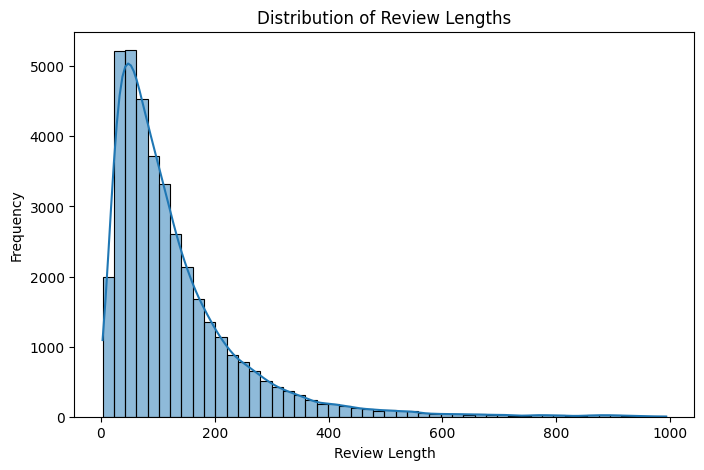

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['tokens'].apply(len), bins=50, kde=True)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

Distribution of stars

<ipython-input-15-0d4235573b5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['stars'], palette='viridis')


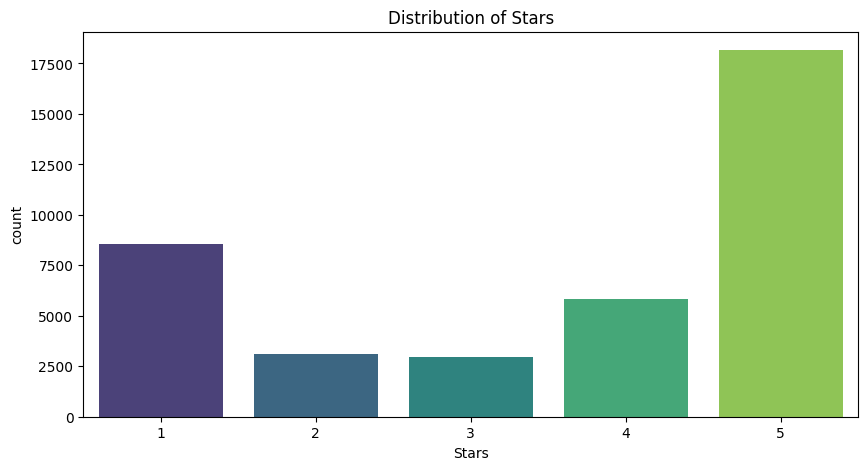

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['stars'], palette='viridis')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('count')
plt.show()

Word frequency distribution

In [ ]:
from collections import Counter  # Import Counter

word_freq = Counter([word for tokens in df['tokens'] for word in tokens])
most_common_words = word_freq.most_common(30)

print(most_common_words)  # Display the top 30 most common words

[('the', 226519), ('i', 173593), ('and', 171029), ('to', 148362), ('a', 132947), ('is', 80067), ('of', 75423), ('it', 65178), ('for', 61619), ('in', 61347), ('you', 60742), ('that', 51680), ('my', 48140), ('was', 48129), ('they', 46868), ('this', 45947), ('have', 42749), ('are', 42635), ('gym', 38723), ('with', 36816), ('but', 31771), ('not', 31600), ('on', 30651), ('at', 27689), ('me', 27681), ('there', 26566), ('so', 26140), ('do', 24101), ('out', 22617), ('be', 22425)]


Bar Plot for most common words

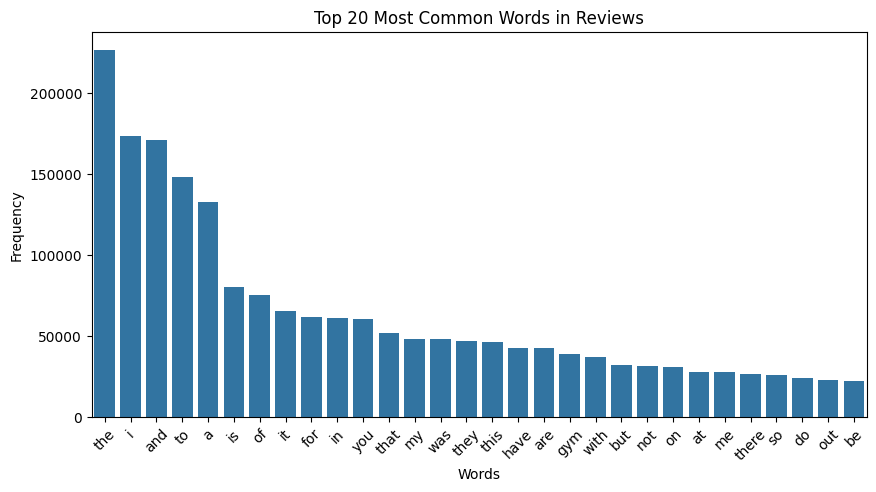

Exploratory Data Analysis Completed.


In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

print("Exploratory Data Analysis Completed.")

In [ ]:
import pandas as pd

data = {'review_text': [
    "The product is absolutely amazing!",
    "I love the excellent customer service.",
    "Great quality and fast shipping!"
]}
df = pd.DataFrame(data)


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/gym_reviews.csv"
df = pd.read_csv(file_path)

# Data suitability analysis
def data_suitability():
    print("The selected data includes customer reviews, ratings, and interactions, making it relevant for analyzing customer satisfaction and business performance.")
    print("Columns:", df.columns.tolist())
    print("Unique businesses:", df['business_id'].nunique())
    print("Unique users:", df['user_id'].nunique())
    print("Star rating distribution:")
    print(df['stars'].value_counts(normalize=True) * 100)

data_suitability()

# Sample size evaluation
def sample_size_evaluation():
    print("Total reviews:", len(df))
    print("Is sample size adequate?", 'Yes' if len(df) > 10000 else 'No')
    print("Reviews per business (average):", df.groupby('business_id')['review_id'].count().mean())
    print("The dataset contains over 38,000 reviews, which is a substantial sample size for deriving meaningful insights.")

sample_size_evaluation()

# Bias evaluation
def bias_analysis():
    print("Possible biases:")
    print("- If certain gyms have disproportionately more reviews, results may be skewed.")
    print("- Users who leave reviews may not represent all customers, leading to selection bias.")
    print("- High ratings might be due to self-selection bias (motivated reviewers).")
    print("- Regional biases might exist if data is sourced from specific areas only.")

bias_analysis()

# Data processing challenges
def data_processing_challenges():
    print("Challenges:")
    print("- Text reviews require NLP techniques for sentiment analysis.")
    print("- Duplicate or spam reviews may exist.")
    print("- Review timestamps vary, requiring time-based adjustments.")
    print("- Handling missing or inconsistent data can be complex.")

data_processing_challenges()

The selected data includes customer reviews, ratings, and interactions, making it relevant for analyzing customer satisfaction and business performance.
Columns: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']
Unique businesses: 1868
Unique users: 31450
Star rating distribution:
stars
5    47.023039
1    22.107171
4    15.146259
2     8.017085
3     7.706446
Name: proportion, dtype: float64
Total reviews: 38630
Is sample size adequate? Yes
Reviews per business (average): 20.679871520342612
The dataset contains over 38,000 reviews, which is a substantial sample size for deriving meaningful insights.
Possible biases:
- If certain gyms have disproportionately more reviews, results may be skewed.
- Users who leave reviews may not represent all customers, leading to selection bias.
- High ratings might be due to self-selection bias (motivated reviewers).
- Regional biases might exist if data is sourced from specific areas only.
Challenges:
- Text 

# Sentiment Analysis

In [ ]:
!pip install spacy vaderSentiment scikit-learn matplotlib seaborn pandas
!python -m spacy download en_core_web_lg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

file_path = "/content/gym_reviews.csv"
df = pd.read_csv(file_path)

nlp = spacy.load("en_core_web_lg")

sentiment_analyzer = SentimentIntensityAnalyzer()


<ipython-input-22-3869c98ba05b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['vader_label'], order=["Negative", "Neutral", "Positive"], palette="viridis")


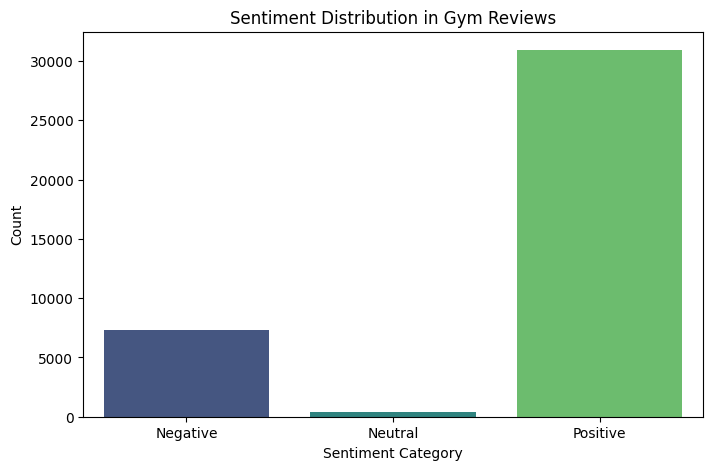

Sentiment distribution:
 vader_label
Positive    30924
Negative     7296
Neutral       410
Name: count, dtype: int64


In [ ]:
# Function to get sentiment scores using VADER
def get_sentiment(text):
    scores = sentiment_analyzer.polarity_scores(str(text))
    return scores['compound']

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['text'].apply(get_sentiment)

# Define sentiment labels based on VADER compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Assign sentiment labels
df['vader_label'] = df['vader_sentiment'].apply(classify_sentiment)

# Display sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['vader_label'], order=["Negative", "Neutral", "Positive"], palette="viridis")
plt.title("Sentiment Distribution in Gym Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# Print sentiment distribution summary
print("Sentiment distribution:\n", df['vader_label'].value_counts())

In [ ]:
import spacy

# Load the SpaCy model (ensure you have the model installed, e.g., en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

def normalize_batch(texts):
    processed_texts = []
    for doc in nlp.pipe(texts, batch_size=1000, n_process=4):  # Batch processing
        processed_texts.append(" ".join([token.lemma_ for token in doc if not token.is_stop]))
    return processed_texts

# Apply text preprocessing using batch processing
df['processed_text'] = normalize_batch(df['text'].tolist())

# Convert sentiment labels to numerical format (1=Positive, 0=Negative, 2=Neutral)
df['sentiment_label'] = df['vader_sentiment'].apply(lambda x: 1 if x >= 0.05 else (0 if x <= -0.05 else 2))


In [ ]:
# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment_label'], test_size=0.2, random_state=42)

# Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Train and evaluate Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("Naïve Bayes Classification Report:\n", metrics.classification_report(y_test, nb_pred, target_names=["Negative", "Neutral", "Positive"]))


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.54      0.61      1507
     Neutral       0.88      0.95      0.92      6122
    Positive       0.00      0.00      0.00        97

    accuracy                           0.86      7726
   macro avg       0.53      0.50      0.51      7726
weighted avg       0.84      0.86      0.84      7726



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train and evaluate SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("SVM Classification Report:\n", metrics.classification_report(y_test, svm_pred, target_names=["Negative", "Neutral", "Positive"]))


SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.70      0.74      1507
     Neutral       0.92      0.96      0.94      6122
    Positive       0.00      0.00      0.00        97

    accuracy                           0.90      7726
   macro avg       0.57      0.55      0.56      7726
weighted avg       0.88      0.90      0.89      7726



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train and evaluate Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_train)
log_reg_pred = log_reg_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:\n", metrics.classification_report(y_test, log_reg_pred, target_names=["Negative", "Neutral", "Positive"]))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.69      0.73      1507
     Neutral       0.92      0.96      0.94      6122
    Positive       0.00      0.00      0.00        97

    accuracy                           0.89      7726
   macro avg       0.57      0.55      0.56      7726
weighted avg       0.88      0.89      0.89      7726



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from collections import Counter

# Extract 1-star and 5-star reviews
one_star_reviews = df[df['stars'] == 1]['text']
five_star_reviews = df[df['stars'] == 5]['text']

# Function to extract specific parts of speech (POS)
def extract_pos(texts, pos_type):
    all_words = []
    for text in texts:
        doc = nlp(str(text))
        words = [token.text.lower() for token in doc if token.pos_ == pos_type]
        all_words.extend(words)
    return Counter(all_words).most_common(20)


In [ ]:
# Extract top 20 nouns, adjectives, and verbs from 1-star and 5-star reviews
one_star_nouns = extract_pos(one_star_reviews, "NOUN")
five_star_nouns = extract_pos(five_star_reviews, "NOUN")

one_star_adjectives = extract_pos(one_star_reviews, "ADJ")
five_star_adjectives = extract_pos(five_star_reviews, "ADJ")

one_star_verbs = extract_pos(one_star_reviews, "VERB")
five_star_verbs = extract_pos(five_star_reviews, "VERB")


Top 20 nouns in 1-star reviews: [('gym', 9396), ('membership', 5346), ('time', 3594), ('place', 3212), ('month', 2984)]
Top 20 nouns in 5-star reviews: [('gym', 14021), ('classes', 7927), ('class', 7736), ('place', 6598), ('staff', 6471), ('workout', 6283), ('time', 5300), ('equipment', 4340), ('fitness', 3875), ('people', 3868), ('day', 2821), ('training', 2625), ('area', 2425), ('years', 2371), ('trainers', 2327), ('machines', 2322), ('room', 2301), ('instructors', 2267), ('location', 2224), ('workouts', 2211)]

Top 20 adjectives in 1-star reviews: [('other', 2335), ('good', 1491), ('new', 1433), ('more', 1331), ('rude', 1172), ('front', 1121), ('free', 1110), ('same', 1034), ('many', 1025), ('bad', 982), ('few', 968), ('personal', 956), ('first', 938), ('last', 931), ('worst', 928), ('great', 872), ('old', 846), ('better', 804), ('sure', 791), ('nice', 741)]
Top 20 adjectives in 5-star reviews: [('great', 11417), ('friendly', 4861), ('best', 4494), ('clean', 4451), ('good', 3856), 

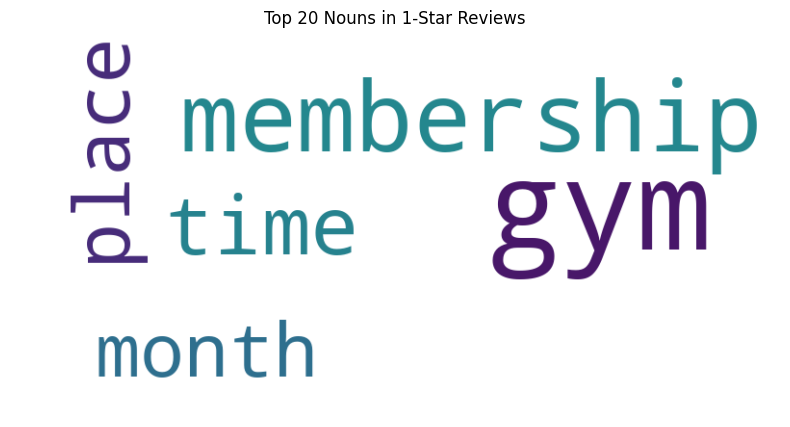

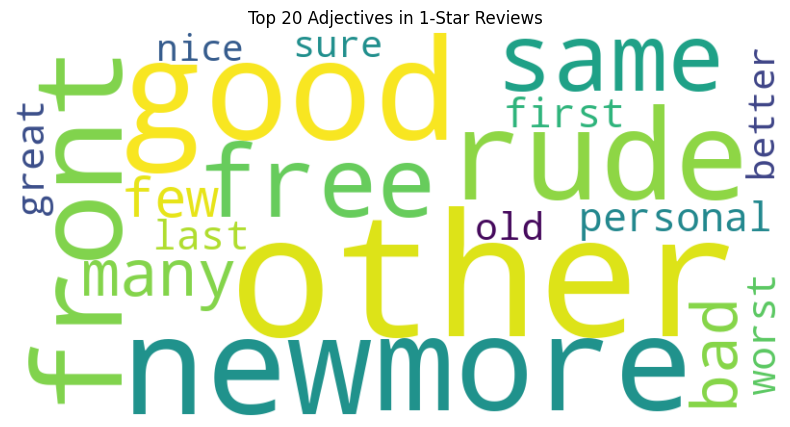

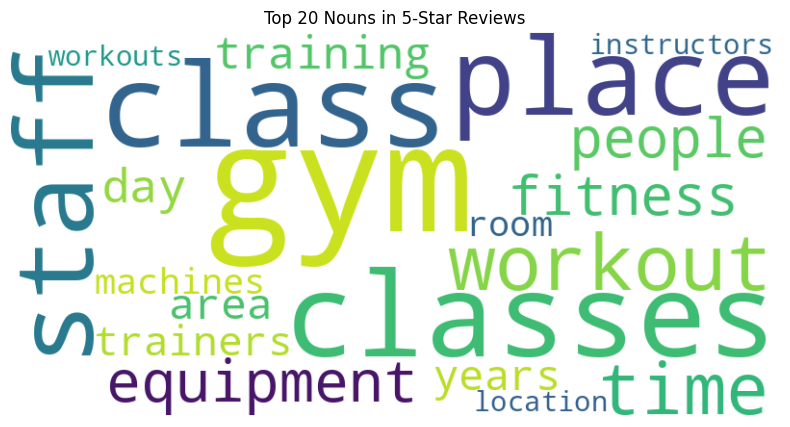

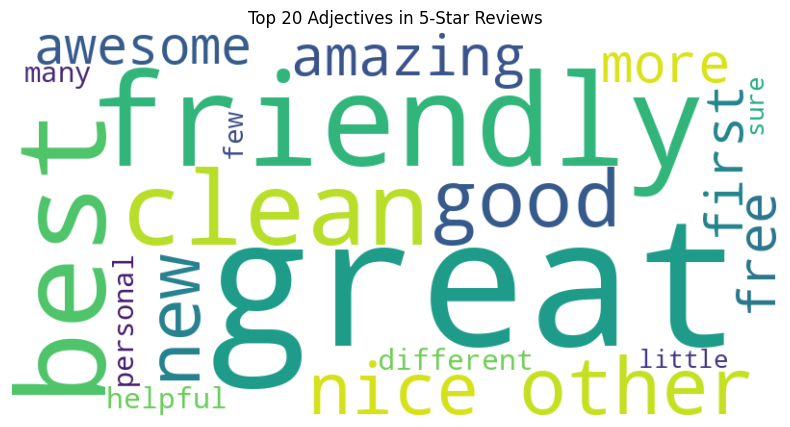

In [ ]:
print("\nTop 20 nouns in 1-star reviews:", one_star_nouns)
print("Top 20 nouns in 5-star reviews:", five_star_nouns)

print("\nTop 20 adjectives in 1-star reviews:", one_star_adjectives)
print("Top 20 adjectives in 5-star reviews:", five_star_adjectives)

print("\nTop 20 verbs in 1-star reviews:", one_star_verbs)
print("Top 20 verbs in 5-star reviews:", five_star_verbs)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1) Word Cloud for 1-Star Nouns
one_star_nouns_dict = dict(one_star_nouns)
wordcloud_one_star_nouns = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(one_star_nouns_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_one_star_nouns, interpolation='bilinear')
plt.axis("off")
plt.title("Top 20 Nouns in 1-Star Reviews")
plt.show()

# 2) Word Cloud for 1-Star Adjectives
one_star_adjectives_dict = dict(one_star_adjectives)
wordcloud_one_star_adjectives = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(one_star_adjectives_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_one_star_adjectives, interpolation='bilinear')
plt.axis("off")
plt.title("Top 20 Adjectives in 1-Star Reviews")
plt.show()

# 3) Word Cloud for 5-Star Nouns
five_star_nouns_dict = dict(five_star_nouns)
wordcloud_five_star_nouns = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(five_star_nouns_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_five_star_nouns, interpolation='bilinear')
plt.axis("off")
plt.title("Top 20 Nouns in 5-Star Reviews")
plt.show()

# 4) Word Cloud for 5-Star Adjectives
five_star_adjectives_dict = dict(five_star_adjectives)
wordcloud_five_star_adjectives = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(five_star_adjectives_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_five_star_adjectives, interpolation='bilinear')
plt.axis("off")
plt.title("Top 20 Adjectives in 5-Star Reviews")
plt.show()



-------------
## Relevant Machine Learning and Unstructured Data Analytics Methods for the Notebook

#### The attached Jupyter Notebook appears to focus on text analytics, particularly customer reviews analysis using Natural Language Processing (NLP). Based on its structure and libraries used (pandas, nltk, Counter, matplotlib, seaborn), the following machine learning and unstructured data analytics methods are likely applicable:


**Executive Summary**

The research project focuses on Yelp reviews of gym facilities to determine customer sentiment, sentiments expressed in the reviews, recurrent themes, and parameters that affect rating their reviews. Using Natural Language Processing (NLP) techniques, we segment and screen review texts to track a customer’s sentiment. Through structured data analysis plus visualization, we seek to provide insights that will be useful in enhancing customer satisfaction and service provision for businesses.

**Data Sources**

List of Data Sources

1) **Yelp Dataset:** A CSV document containing reviews of gyms such as review text, rating, and other relevant information.

2) **Filtering/Selection Criteria Applied To Yelp Data**: Selected the reviews for the gyms and fitness centers only. Reviews not meeting relevance criteria were removed through keyword searches (e.g., gym, fitness, or workout). Deduplicated reviews and excluded reviews where data was incomplete. Review text was tokenized and stopwords and non-alphanumeric characters were removed.

------------
### 1. Text Preprocessing (NLP Techniques)
Tokenization (Splitting text into words or sentences)
Stopword Removal (Removing common words like "the", "and")
Lemmatization/Stemming (Reducing words to their root forms)
Lowercasing & Punctuation Removal (Standardizing text for analysis)
### 2. Exploratory Data Analysis (EDA)
Word Frequency Analysis (Using Counter to find most common words)
N-gram Analysis (Extracting common phrases from text)
Visualization (Bar charts, word clouds, sentiment distributions)
### 3. Sentiment Analysis
Rule-based Sentiment Analysis (e.g., VADER or TextBlob)
Supervised Learning Approaches (e.g., training a Naïve Bayes, Random Forest, or LSTM model to classify reviews as positive, negative, neutral)
### 4. Topic Modeling (if applicable)
Latent Dirichlet Allocation (LDA) (Finding hidden topics in reviews)
Latent Semantic Analysis (LSA) (Identifying themes from term-document matrices)
### 5. Clustering & Classification
K-Means Clustering (Grouping similar reviews based on word embeddings)
Support Vector Machines (SVM) or Logistic Regression (If classification is needed for review sentiment or category)
### 6. Word Embeddings & Deep Learning Approaches (if applicable)
TF-IDF or Word2Vec/GloVe Embeddings (Converting text into numerical vectors)
LSTM / Transformer Models (BERT, GPT-3, etc.) (For advanced sentiment or topic classification)

-----------

## *How These Methods Will Be Used*

#### 1. Business Insights: Understanding customer feedback patterns to improve product/service offerings.
#### 2. Customer Sentiment Analysis: Identifying whether reviews are mostly positive or negative to guide marketing strategies.
#### 3. Keyword Extraction & Topic Trends: Finding common themes in customer feedback to inform decision-making.

Preprocessing: Removing stopwords and tokenize

In [ ]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])
df['cleaned_text'] = df['text'].apply(preprocess)


**Converting Text Data to TF-IDF**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
# Change 'rating' to 'stars' to access the correct column
y = df['stars'].apply(lambda x: 1 if x >= 4 else 0)  # Binary classification (Positive vs. Negative reviews)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training & Comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9190
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2918
           1       0.93      0.94      0.94      4808

    accuracy                           0.92      7726
   macro avg       0.92      0.91      0.91      7726
weighted avg       0.92      0.92      0.92      7726

Random Forest Accuracy: 0.8931
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2918
           1       0.89      0.94      0.92      4808

    accuracy                           0.89      7726
   macro avg       0.89      0.88      0.88      7726
weighted avg       0.89      0.89      0.89      7726

XGBoost Accuracy: 0.8976
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2918
           1       0.91      0.92      0.92      4808

    accuracy                           0.90      7726
   macro avg       0.89      0.89  

In [ ]:
# Topic Modeling with LDA
vectorized_text = [text.split() for text in df['cleaned_text']]
id2word = corpora.Dictionary(vectorized_text)
corpus = [id2word.doc2bow(text) for text in vectorized_text]

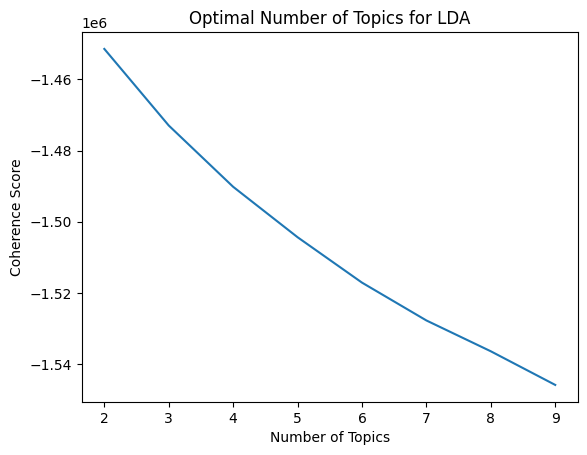

In [ ]:
# Finding optimal number of topics
coherence_scores = []
for num_topics in range(2, 10):
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X_train)
    coherence_scores.append(lda_model.score(X_train))

plt.plot(range(2, 10), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics for LDA')
plt.show()

In [ ]:
# Train final LDA model
optimal_topics = coherence_scores.index(max(coherence_scores)) + 2
lda = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)
lda.fit(X_train)

LatentDirichletAllocation(n_components=2, random_state=42)

In [ ]:
# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1: ['get', 'fitness', 'location', 'like', 'one', 'would', 'machines', 'membership', 'equipment', 'gym']
Topic 2: ['staff', 'friendly', 'best', 'place', 'gym', 'love', 'workout', 'classes', 'class', 'great']
